In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

C:\Users\HP\AppData\Local\Temp\ipykernel_10192\640806056.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
df1 = pd.read_csv('data/df1.csv')
df2 = pd.read_csv('data/df2.csv')
df = pd.concat([df1,df2],0)
df = df[['name','album','artist','id','release_date','popularity','danceability','energy','valence','loudness']]

C:\Users\HP\AppData\Local\Temp\ipykernel_10192\2875045480.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([df1,df2],0)


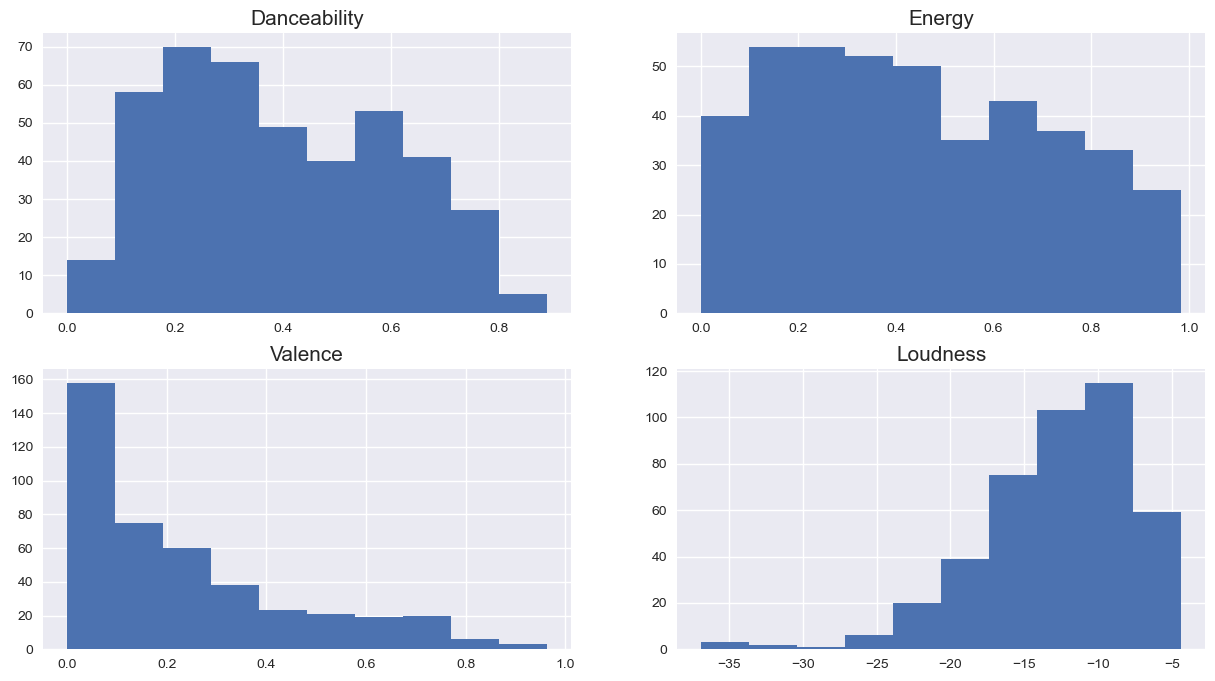

In [3]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

axes[0,0].hist(df['danceability'])
axes[0,0].set_title('Danceability',fontsize=15)
axes[0,1].hist(df['energy'])
axes[0,1].set_title('Energy',fontsize=15)
axes[1,0].hist(df['valence'])
axes[1,0].set_title('Valence',fontsize=15)
axes[1,1].hist(df['loudness'])
axes[1,1].set_title('Loudness',fontsize=15)
plt.show()

In [4]:
df.describe()

,popularity,danceability,energy,valence,loudness
count,423.000000,423.000000,423.000000,423.000000,423.000000
mean,32.628842,0.395588,0.446771,0.236248,-12.805064
std,17.830344,0.203246,0.267740,0.221957,5.176817
min,0.000000,0.000000,0.000791,0.000000,-36.892000
25%,17.000000,0.228000,0.210000,0.047200,-15.899500
50%,33.000000,0.358000,0.420000,0.157000,-11.826000
75%,47.000000,0.563500,0.664500,0.345000,-8.801500
max,82.000000,0.890000,0.985000,0.964000,-4.345000


In [5]:
col_features = df.columns[6:]
X = MinMaxScaler().fit_transform(df[col_features])

In [6]:
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [7]:
df['kmeans'] = kmeans.labels_

Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

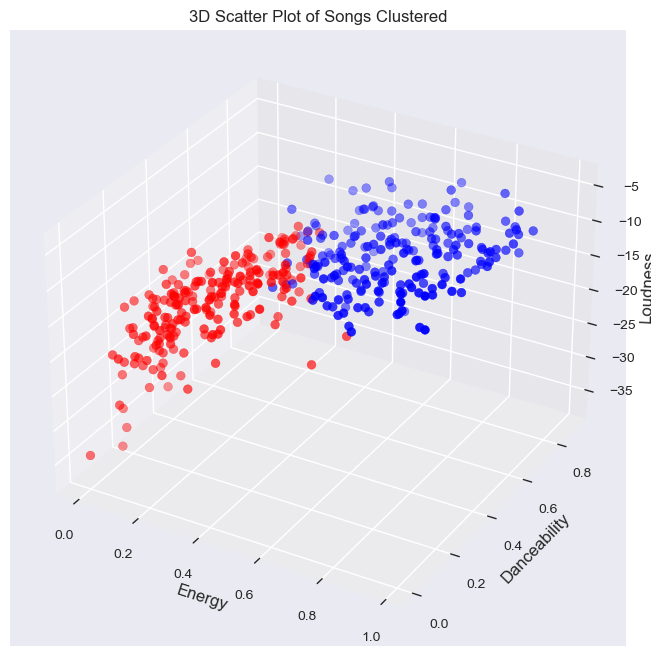

In [8]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df['energy']
y = df['danceability']
z = df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")



In [9]:
df.groupby(['kmeans']).mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_10192\299469960.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['kmeans']).mean()


,popularity,danceability,energy,valence,loudness
kmeans,,,,,
0,37.557143,0.523190,0.665690,0.374453,-9.699890
1,27.769953,0.269783,0.230934,0.099990,-15.866502


In [10]:
cluster_0 = df[df['kmeans']==0]
cluster_1  = df[df['kmeans']==1]

In [11]:
cluster_0.to_csv("data/cluster0.csv",index=False)
cluster_1.to_csv("data/cluster1.csv",index=False)
df.to_csv("data/df.csv",index=False)